<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [3]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s).".format(population.shape[0]))
print("Le tableau comporte {} colonne(s).".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s).
Le tableau comporte 3 colonne(s).


In [4]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s).".format(population.shape[1]))
#La nature des données dans chacune des colonnes
print("La nature des données de chacune des colonnes sont :")
population.info()
#Le nombre de valeurs présentes dans chacune des colonnes
print("Le tableau comporte {} valeurs présentent dans chacune des colonnes.".format(population.shape[0]))

Le tableau comporte 3 colonne(s).
La nature des données de chacune des colonnes sont :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB
Le tableau comporte 1416 valeurs présentent dans chacune des colonnes.


In [5]:
#Affichage les 5 premières lignes de la table
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [6]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
population['Valeur'] = population['Valeur']*1000
population['Valeur'] = population['Valeur'].astype(int)

In [7]:
#changement du nom de la colonne Valeur par Population
population.rename(columns={'Valeur': 'Population'}, inplace=True)

In [8]:
#Affichage les 5 premières lignes de la table pour voir les modifications
population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589
1,Afghanistan,2014,33370794
2,Afghanistan,2015,34413603
3,Afghanistan,2016,35383032
4,Afghanistan,2017,36296113


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [9]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s).".format(dispo_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s).".format(dispo_alimentaire.shape[1]))

Le tableau comporte 15605 observation(s) ou article(s).
Le tableau comporte 18 colonne(s).


In [10]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s).".format(dispo_alimentaire.shape[1]))

Le tableau comporte 18 colonne(s).


In [11]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [12]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire = dispo_alimentaire.fillna(0)

In [13]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
multikg = list(range(3, 5)) + list(range(-9, 0))
dispo_alimentaire.iloc[:, multikg] *= 1000000

In [14]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [15]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s).".format(aide_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s).".format(aide_alimentaire.shape[1]))

Le tableau comporte 1475 observation(s) ou article(s).
Le tableau comporte 4 colonne(s).


In [16]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s).".format(aide_alimentaire.shape[1]))

Le tableau comporte 4 colonne(s).


In [17]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [18]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire.rename(columns={'Pays bénéficiaire': 'Zone'}, inplace=True)

In [19]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire['Valeur'] = aide_alimentaire['Valeur']*1000

In [20]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [21]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s).".format(sous_nutrition.shape[0]))
print("Le tableau comporte {} colonne(s).".format(sous_nutrition.shape[1]))

Le tableau comporte 1218 observation(s) ou article(s).
Le tableau comporte 3 colonne(s).


In [22]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s).".format(sous_nutrition.shape[1]))

Le tableau comporte 3 colonne(s).


In [23]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [24]:
#Conversion de la colonne sous nutrition en numérique
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')

In [25]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0
sous_nutrition = sous_nutrition.fillna(0)

In [26]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition.rename(columns={'Valeur': 'Sous_nutrition'}, inplace=True)

In [27]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition['Sous_nutrition'] = sous_nutrition['Sous_nutrition']*1000000
sous_nutrition['Sous_nutrition'] = sous_nutrition['Sous_nutrition'].astype(int)

In [28]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,Sous_nutrition
0,Afghanistan,2012-2014,8600000
1,Afghanistan,2013-2015,8800000
2,Afghanistan,2014-2016,8900000
3,Afghanistan,2015-2017,9700000
4,Afghanistan,2016-2018,10500000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [29]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
SN_2017= pd.merge(population.loc[population['Année'] == 2017,["Zone", "Population"]],
                  sous_nutrition.loc[sous_nutrition['Année'] == '2016-2018',["Zone", "Sous_nutrition"]],
                  on='Zone')

In [30]:
#Affichage du dataset
display(SN_2017)

,Zone,Population,Sous_nutrition
0,Afghanistan,36296113,10500000
1,Afrique du Sud,57009756,3100000
2,Albanie,2884169,100000
3,Algérie,41389189,1300000
4,Allemagne,82658409,0
...,...,...,...
198,Venezuela (République bolivarienne du),29402484,8000000
199,Viet Nam,94600648,6500000
200,Yémen,27834819,0
201,Zambie,16853599,0


In [31]:
#Calcul et affichage du nombre de personnes en état de sous nutrition
print("Il y a {} personnes en sous nutrition en 2017.".format(SN_2017['Sous_nutrition'].sum()))
print("Cela représente {}% de la population mondiale en 2017.".format(int((SN_2017['Sous_nutrition'].sum()) / (SN_2017['Population'].sum())*100)))

Il y a 535700000 personnes en sous nutrition en 2017.
Cela représente 7% de la population mondiale en 2017.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [32]:
#Combien mange en moyenne un être humain ? Source =>
print("Un humain mange en moyenne 2500Kcal/jour.")

Un humain mange en moyenne 2500Kcal/jour.


In [33]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
popu_dispoAlim = pd.merge(population, dispo_alimentaire, on='Zone', how='inner')
popu_dispoAlim = popu_dispoAlim.loc[(popu_dispoAlim['Année'] == 2017), :]

In [34]:
#Affichage du nouveau dataframe
display(popu_dispoAlim)

,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
240,Afghanistan,2017,36296113,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
241,Afghanistan,2017,36296113,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
242,Afghanistan,2017,36296113,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
243,Afghanistan,2017,36296113,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,Afghanistan,2017,36296113,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92399,Zimbabwe,2017,14236595,Viande de Suides,animale,0.0,0.0,24.0,2.65,2.25,0.83,37000000.0,0.0,6000000.0,37000000.0,0.0,32000000.0,0.0,0.0,0.0
92400,Zimbabwe,2017,14236595,Viande de Volailles,animale,0.0,0.0,17.0,4.97,1.05,1.69,70000000.0,0.0,6000000.0,70000000.0,0.0,64000000.0,0.0,0.0,0.0
92401,Zimbabwe,2017,14236595,"Viande, Autre",animale,0.0,1000000.0,7.0,2.29,0.21,1.12,34000000.0,3000000.0,1000000.0,32000000.0,0.0,36000000.0,0.0,0.0,0.0
92402,Zimbabwe,2017,14236595,Vin,vegetale,0.0,0.0,1.0,0.27,0.00,0.00,4000000.0,0.0,2000000.0,4000000.0,0.0,2000000.0,0.0,0.0,0.0


In [35]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
popu_dispoAlim['dispo_kcal'] = popu_dispoAlim['Population'] * popu_dispoAlim['Disponibilité alimentaire (Kcal/personne/jour)']

In [36]:
#Calcul du nombre d'humains pouvant être nourris
print("Il y avait {} humains pouvant etre nourris en 2017.".format(int((popu_dispoAlim['dispo_kcal'].sum()) / 2500)))
print("Cela représente {}% de la population mondiale en 2017.".format(int((popu_dispoAlim['dispo_kcal'].sum() / 2500) / (SN_2017['Population'].sum())*100)))

Il y avait 8367593843 humains pouvant etre nourris en 2017.
Cela représente 110% de la population mondiale en 2017.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [37]:
#Transfert des données avec les végétaux dans un nouveau dataframe
popu_dispoAlimVege = popu_dispoAlim.loc[(popu_dispoAlim['Origine'] == 'vegetale'), :]

In [38]:
#Calcul du nombre de kcal disponible pour les végétaux
print("Il y avait {} kcal/jours disponibles en 2017.".format(int((popu_dispoAlimVege['dispo_kcal'].sum())))) 

Il y avait 17260764197424 kcal/jours disponibles en 2017.


In [39]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
print("Il y avait {} humains pouvant etre nourris avec les végétaux en 2017.".format(int((popu_dispoAlimVege['dispo_kcal'].sum()) / 2500)))
print("Cela représente {}% de la population mondiale en 2017.".format(int((popu_dispoAlimVege['dispo_kcal'].sum() / 2500) / (SN_2017['Population'].sum())*100)))

Il y avait 6904305678 humains pouvant etre nourris avec les végétaux en 2017.
Cela représente 91% de la population mondiale en 2017.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [40]:
#Calcul de la disponibilité totale
dispo_totale = (int((popu_dispoAlim['Disponibilité intérieure'].sum())))
print("En 2017, la disponibilité totale intérieure mondiale était de {} Kg.".format(int((popu_dispoAlim['Disponibilité intérieure'].sum()))))

En 2017, la disponibilité totale intérieure mondiale était de 9733927000000 Kg.


Text(0.5, 1.0, 'Répartition de la disponibilité intérieure par catégorie')

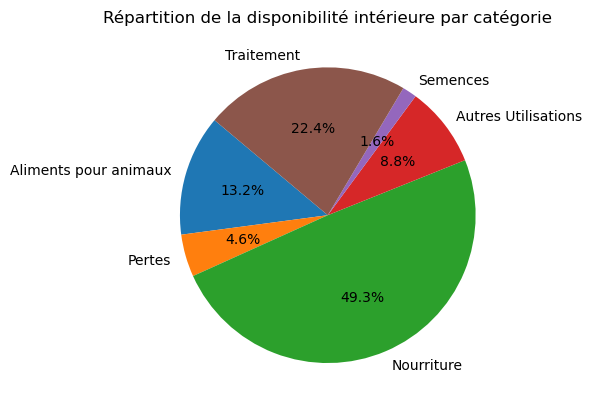

In [41]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, 
APN = ['Aliments pour animaux', 'Pertes', 'Nourriture', 'Autres Utilisations', 'Semences', 'Traitement']
PourcentagesAPN = []
for element in APN:
    resultat = round((popu_dispoAlim[element].sum()) / (popu_dispoAlim['Disponibilité intérieure'].sum()) * 100, 2)
    PourcentagesAPN.append(resultat)
plt.pie(PourcentagesAPN, labels=APN, autopct='%1.1f%%', startangle=140)
plt.title('Répartition de la disponibilité intérieure par catégorie')

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [42]:
#Création d'une liste avec toutes les variables
liste_variables = popu_dispoAlim['Produit'].unique().tolist()
print(liste_variables)
cereales = ['Blé', 'Céréales, Autres', 'Maïs', 'Millet', 'Orge', 'Riz (Eq Blanchi)', 'Avoine', 'Seigle', 'Sorgho']

['Abats Comestible', 'Agrumes, Autres', 'Aliments pour enfants', 'Ananas', 'Bananes', 'Beurre, Ghee', 'Bière', 'Blé', 'Boissons Alcooliques', 'Café', 'Coco (Incl Coprah)', 'Crème', 'Céréales, Autres', 'Dattes', 'Edulcorants Autres', 'Feve de Cacao', 'Fruits, Autres', 'Graines de coton', 'Graines de tournesol', 'Graisses Animales Crue', 'Huil Plantes Oleif Autr', 'Huile Graines de Coton', "Huile d'Arachide", "Huile d'Olive", 'Huile de Colza&Moutarde', 'Huile de Palme', 'Huile de Soja', 'Huile de Sésame', 'Huile de Tournesol', 'Lait - Excl Beurre', 'Légumes, Autres', 'Légumineuses Autres', 'Maïs', 'Miel', 'Millet', 'Miscellanees', 'Noix', 'Oeufs', 'Olives', 'Oranges, Mandarines', 'Orge', 'Plantes Oleiferes, Autre', 'Poissons Eau Douce', 'Poivre', 'Pommes', 'Pommes de Terre', 'Raisin', 'Riz (Eq Blanchi)', 'Sucre Eq Brut', 'Sucre, betterave', 'Sucre, canne', 'Sésame', 'Thé', 'Tomates', "Viande d'Ovins/Caprins", 'Viande de Bovins', 'Viande de Volailles', 'Viande, Autre', 'Vin', 'Épices, Aut

In [43]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
popu_dispoAlimCere = popu_dispoAlim[popu_dispoAlim['Produit'].isin(cereales)]

In [44]:
#Affichage de la proportion d'alimentation animale
print("La proporition d'alimentation animale représente {}% des produits céréaliers.".format(int((popu_dispoAlimCere['Aliments pour animaux'].sum()) / (popu_dispoAlimCere['Disponibilité intérieure'].sum())*100)))

La proporition d'alimentation animale représente 36% des produits céréaliers.


In [45]:
#Affichage de la proportion d'alimentation humaine
print("La proporition d'alimentation humaine représente {}% des produits céréaliers.".format(int((popu_dispoAlimCere['Nourriture'].sum()) / (popu_dispoAlimCere['Disponibilité intérieure'].sum())*100)))

La proporition d'alimentation humaine représente 42% des produits céréaliers.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [46]:
#Création de la colonne proportion par pays
SN_2017['Proportion_par_pays_en_%'] = ((SN_2017['Sous_nutrition'] / SN_2017['Population'])*100).astype(int)

In [47]:
#affichage après trie des 10 pires pays
SN_2017.sort_values(by='Proportion_par_pays_en_%', ascending=False).head(10)

,Zone,Population,Sous_nutrition,Proportion_par_pays_en_%
78,Haïti,10982366,5300000,48
157,République populaire démocratique de Corée,25429825,12000000,47
108,Madagascar,25570512,10500000,41
103,Libéria,4702226,1800000,38
100,Lesotho,2091534,800000,38
183,Tchad,15016753,5700000,37
161,Rwanda,11980961,4200000,35
121,Mozambique,28649018,9400000,32
186,Timor-Leste,1243258,400000,32
0,Afghanistan,36296113,10500000,28


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [48]:
#calcul du total de l'aide alimentaire par pays
total_aide = aide_alimentaire.groupby('Zone')['Valeur'].sum().reset_index()

In [49]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
total_aide.sort_values(by='Valeur', ascending=False).head(10)

,Zone,Valeur
50,République arabe syrienne,1858943000
75,Éthiopie,1381294000
70,Yémen,1206484000
61,Soudan du Sud,695248000
60,Soudan,669784000
30,Kenya,552836000
3,Bangladesh,348188000
59,Somalie,292678000
53,République démocratique du Congo,288502000
43,Niger,276344000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [50]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
aide_alimgroup = aide_alimentaire.groupby(['Zone', 'Année']).agg({'Valeur': 'sum'}).reset_index()

In [51]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
aide_alim5 = ['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan']

In [52]:
#On filtre sur le dataframe avec notre liste
aide_alimgroup5 = aide_alimgroup[aide_alimgroup['Zone'].isin(aide_alim5)]

C:\Users\snowf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\snowf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([<matplotlib.axis.XTick at 0x1a99c3dca50>,
 [Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016')])

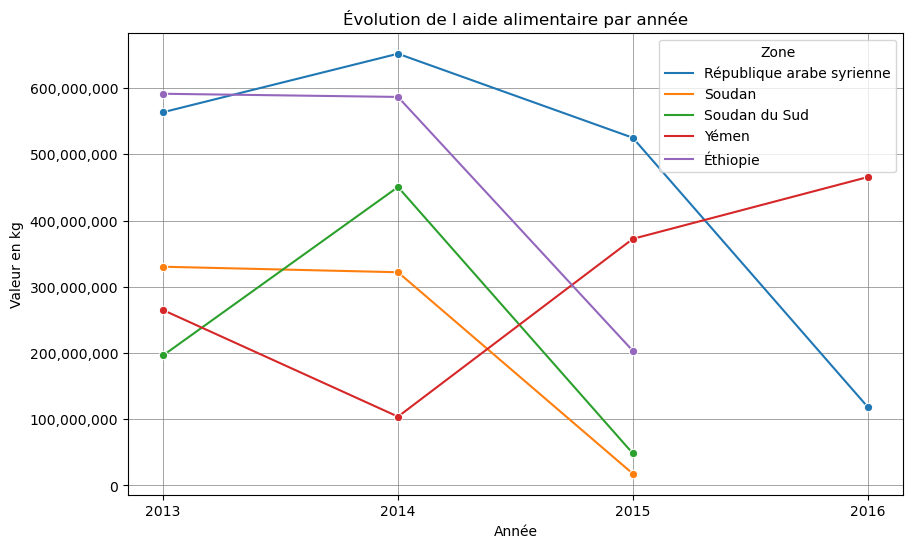

In [53]:
# Affichage des pays avec l'aide alimentaire par année
plt.figure(figsize=(10,6))
sns.lineplot(data=aide_alimgroup5, x='Année', y='Valeur', hue='Zone', marker='o')
plt.title('Évolution de l aide alimentaire par année')
plt.xlabel('Année')
plt.ylabel('Valeur en kg')
plt.legend(title='Zone')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.gca().get_yaxis().set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.xticks(aide_alimgroup5['Année'].unique())

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [54]:
#Calcul de la disponibilité en kcal par personne par jour par pays
dispoAlimjp = popu_dispoAlim.groupby(['Zone', 'Population']).agg({'dispo_kcal': 'sum'}).reset_index()
dispoAlimjp['dispo_kcal_pers_jour'] = ((dispoAlimjp['dispo_kcal'] / dispoAlimjp['Population'])).astype(int)

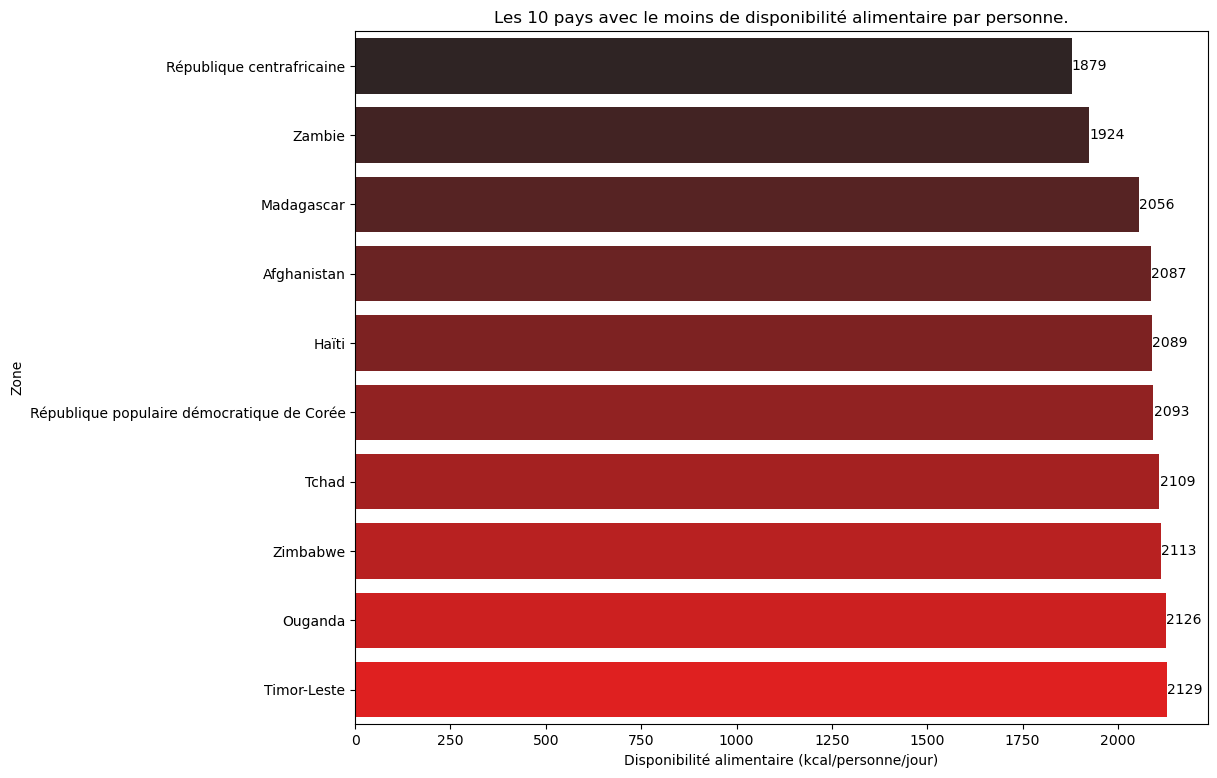

In [55]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
Min = dispoAlimjp.sort_values(by='dispo_kcal_pers_jour', ascending=True).head(10)
plt.figure(figsize=(11,9))
paletteMin = sns.dark_palette("red", len(Min))
sns.barplot(data=Min, x='dispo_kcal_pers_jour', y='Zone', palette=paletteMin, errorbar=None)
plt.title('Les 10 pays avec le moins de disponibilité alimentaire par personne.')
plt.ylabel('Zone')
plt.xlabel('Disponibilité alimentaire (kcal/personne/jour)')
for index, value in enumerate(Min['dispo_kcal_pers_jour']):
    plt.text(value + 0.5, index, str(round(value, 2)), ha='left', va='center')

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

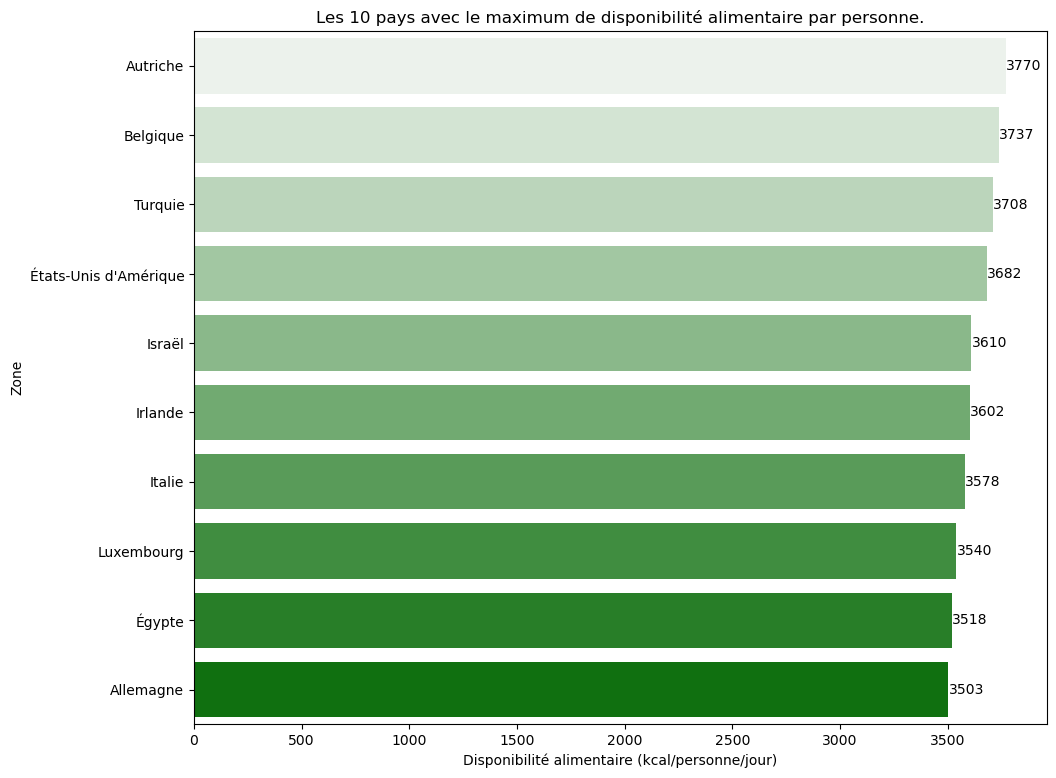

In [56]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
Max = dispoAlimjp.sort_values(by='dispo_kcal_pers_jour', ascending=False).head(10)
plt.figure(figsize=(11,9))
paletteMax = sns.light_palette("green", len(Max))
sns.barplot(data=Max, x='dispo_kcal_pers_jour', y='Zone', palette=paletteMax, errorbar=None)
plt.title('Les 10 pays avec le maximum de disponibilité alimentaire par personne.')
plt.xlabel('Disponibilité alimentaire (kcal/personne/jour)')
plt.ylabel('Zone')
for index, value in enumerate(Max['dispo_kcal_pers_jour']):
    plt.text(value + 0.5, index, str(round(value, 2)), ha='left', va='center')

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [57]:
#création d'un dataframe avec uniquement la Thaïlande 
Thailande = pd.merge(popu_dispoAlim.loc[popu_dispoAlim['Zone'] == 'Thaïlande'],
                  SN_2017.loc[SN_2017['Zone'] == 'Thaïlande',["Zone", "Sous_nutrition"]],
                  on='Zone', how='inner')
ThailandeManioc = Thailande.loc[Thailande['Produit'] == 'Manioc']

In [58]:
#Calcul de la sous nutrition en Thaïlande
print(f"Le pourcentage de sous-nutrition en Thaïlande est de {int((Thailande.iloc[0]['Sous_nutrition'] / Thailande.iloc[0]['Population']) * 100)}%.")

Le pourcentage de sous-nutrition en Thaïlande est de 8%.


In [59]:
# On calcule la proportion exportée en fonction de la proportion
ExportManioc =(ThailandeManioc['Exportations - Quantité'] / ThailandeManioc['Production'] * 100).mean()
print("En 2017, la Thaïlande exportait {:.2f}% de sa production de manioc.".format(ExportManioc))

En 2017, la Thaïlande exportait 83.41% de sa production de manioc.


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [60]:
#Rajouter en dessous toutes les analyses complémtaires suite à la demande de mélanie :
#"et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être 
#le plus en difficulté au niveau alimentaire"

In [61]:
print("En tout, en 2017 la Thaïlande exportait {}% de sa production intérieure.".format(int(Thailande['Exportations - Quantité'].sum() / Thailande['Production'].sum() *100)))

En tout, en 2017 la Thaïlande exportait 24% de sa production intérieure.


In [62]:
result = popu_dispoAlim.loc[(popu_dispoAlim['Zone'].str.contains('Thaïlande', case=False, na=False))].copy()
result['%_export'] = ((result['Exportations - Quantité'] / result['Production']) * 100)
result1 = result.sort_values(by='%_export', ascending=False).head(10)
display(result1[['Zone', 'Année', 'Produit','Exportations - Quantité', 'Production']])

,Zone,Année,Produit,Exportations - Quantité,Production
85143,Thaïlande,2017,Plantes Aquatiques,1000000.0,0.0
85085,Thaïlande,2017,"Beurre, Ghee",1000000.0,0.0
85129,Thaïlande,2017,Millet,1000000.0,0.0
85168,Thaïlande,2017,"Viande, Autre",96000000.0,0.0
85169,Thaïlande,2017,Vin,8000000.0,0.0
85150,Thaïlande,2017,Pommes,43000000.0,0.0
85079,Thaïlande,2017,Aliments pour enfants,7000000.0,0.0
85087,Thaïlande,2017,Blé,237000000.0,2000000.0
85099,Thaïlande,2017,Feve de Cacao,22000000.0,1000000.0
85090,Thaïlande,2017,Café,150000000.0,50000000.0


Text(0.5, 1.0, 'Répartition de la disponibilité intérieure des céréales')

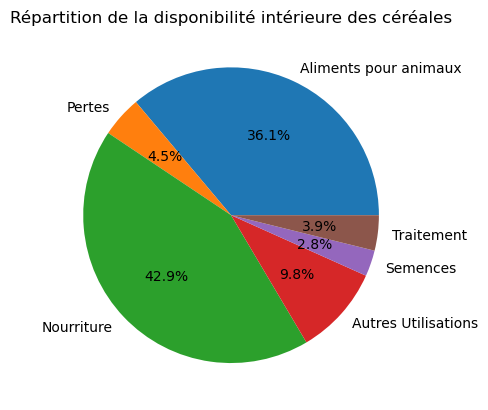

In [66]:
APN = ['Aliments pour animaux', 'Pertes', 'Nourriture', 'Autres Utilisations', 'Semences', 'Traitement']
PourcentagesAPN = []
for element in APN:
    resultat = round((popu_dispoAlimCere[element].sum()) / (popu_dispoAlimCere['Disponibilité intérieure'].sum()) * 100, 2)
    PourcentagesAPN.append(resultat)
plt.pie(PourcentagesAPN, labels=APN, autopct='%1.1f%%')
plt.title('Répartition de la disponibilité intérieure des céréales')

Text(0.5, 1.0, 'Proportion de personnes en état de sous-nutrition')

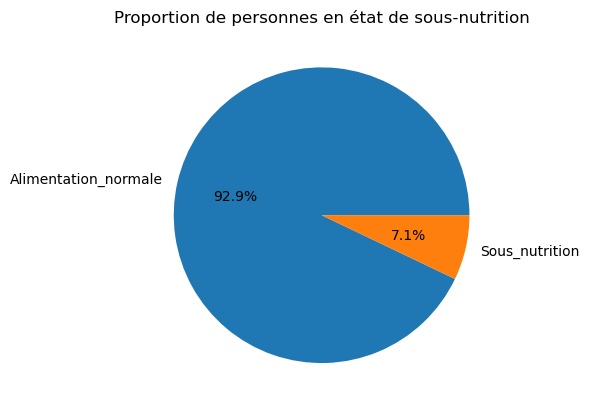

In [64]:
SN_2017['Alimentation_normale'] = (SN_2017['Population'] - SN_2017['Sous_nutrition'])
SN = ['Alimentation_normale','Sous_nutrition']
PourcentagesSN = []
for element in SN:
    resultat = round((SN_2017[element].sum()) / (SN_2017['Population'].sum()) * 100, 2)
    PourcentagesSN.append(resultat)
plt.pie(PourcentagesSN, labels=SN, autopct='%1.1f%%')
plt.title('Proportion de personnes en état de sous-nutrition')